<a href="https://colab.research.google.com/github/bayuryunarko/ML-in-Financial-Analysis/blob/main/02MLFinancialAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Time Series Data

In [ ]:
pip install yfinance

In [15]:
# import lib
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:
# download data
df = yf.download('MSFT', auto_adjust=False, progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [5]:
df

adj_close
Date                  
1986-03-13    0.061608
1986-03-14    0.063809
1986-03-17    0.064909
1986-03-18    0.063258
1986-03-19    0.062158
...                ...
2021-07-27  286.540009
2021-07-28  286.220001
2021-07-29  286.500000
2021-07-30  284.910004
2021-08-02  284.820007

[8920 rows x 1 columns]

In [6]:
# create simple and log returns
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [8]:
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
1986-03-13   0.061608         NaN       NaN
1986-03-14   0.063809    0.035713  0.035090
1986-03-17   0.064909    0.017249  0.017102
1986-03-18   0.063258   -0.025431 -0.025760
1986-03-19   0.062158   -0.017391 -0.017544

In [9]:
# dropping NA's in the first row
df.dropna(how='any', inplace=True)

In [13]:
df.head()

adj_close  simple_rtn   log_rtn
Date                                       
1986-03-14   0.063809    0.035713  0.035090
1986-03-17   0.064909    0.017249  0.017102
1986-03-18   0.063258   -0.025431 -0.025760
1986-03-19   0.062158   -0.017391 -0.017544
1986-03-20   0.060508   -0.026547 -0.026905

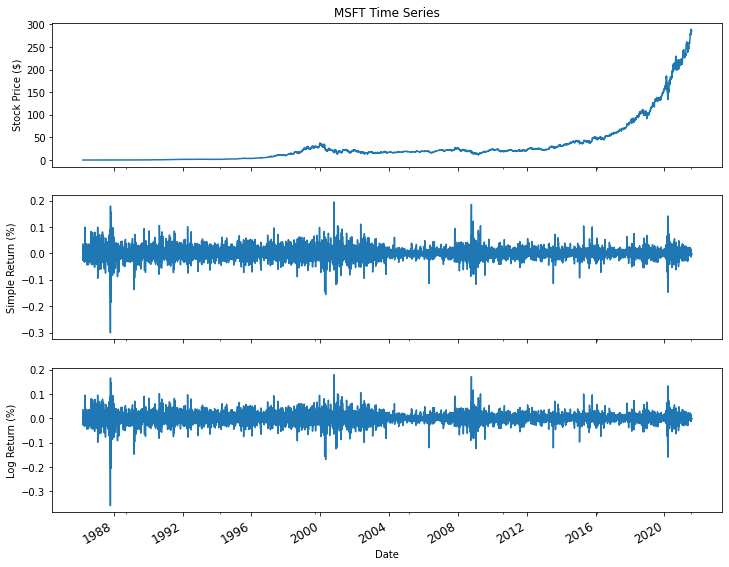

In [17]:
# plot data
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12,10))

# add price 
df.adj_close.plot(ax=ax[0])
ax[0].set(title='MSFT Time Series', ylabel='Stock Price ($)')

# add simple return 
df.simple_rtn.plot(ax=ax[1])
ax[1].set(ylabel='Simple Return (%)')

# add log return 
df.log_rtn.plot(ax=ax[2])
ax[2].set(ylabel='Log Return (%)', xlabel='Date')
ax[2].tick_params(axis='x', which='major', labelsize=12)

# plt.tight_layout()
plt.show()

In [ ]:
pip install cufflinks

In [23]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [24]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode()

In [28]:
cf.set_config_file(world_readable=True, theme='pearl', offline=True)
df.iplot(subplots=True, shape=(3,10), shared_xaxes=True, title='MSFT Time Series')